============================pourcentage de valeurs manquantes par variables=================================
MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
target        0.0
dtype: float64
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075 

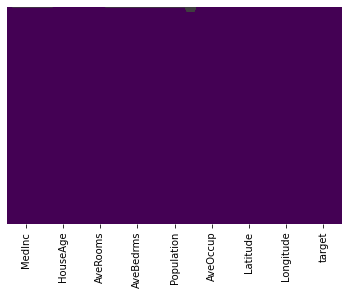

In [3]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

# Charger le dataset
california = fetch_california_housing()

# S´eparer les caract´eristiques et la variable cible
x, y = california.data, california.target

# Analyse des variables
df = pd.DataFrame(data=x, columns=california.feature_names)
# Ajouter la variable cible (prix)
df['target'] = california.target

# Dispersion des variables quantitatives
sns.boxplot(x='target', data=df)
plt.savefig('boxplot.png')

# Vérification des valeurs manquantes
print('============================pourcentage de valeurs manquantes par variables=================================')
missing_values_percentage = (df.shape[0] - df.count()) / df.shape[0] * 100
print(missing_values_percentage)

# Heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.savefig('heatmap.png')

# Mesure de corrélation entre les variables
correlation_matrix = df.corr()
print(correlation_matrix)

# Matrice de corrélation
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.savefig('matrice_correlation.png')
plt.close()

# Histogrammes des caractéristiques
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.savefig('histogrammes.png')
plt.close()

# Boîtes à moustaches
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='MedInc', y='target')
plt.title('Prix médian des logements en fonction du revenu médian des ménages')
plt.tight_layout()
plt.savefig('boxplot.png')
plt.close()